In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [16]:
# PART 1: Load the dataset
file_path = "0 CAC _ Case Study Data .xlsx"
control_df = pd.read_excel(file_path, sheet_name='Control')
test_df = pd.read_excel(file_path, sheet_name='Test ')

In [17]:
# PART 2: basic information
print("Control Group Info:\n", control_df.info())
print("Test Group Info:\n", test_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kid Name                    1000 non-null   object 
 1   Age(In Years)               1000 non-null   int64  
 2   State                       1000 non-null   object 
 3   Is Male?                    1000 non-null   int64  
 4   Is Rural Area ?             1000 non-null   int64  
 5   Is Meat Consumer?           1000 non-null   int64  
 6   HouseHold Income per month  1000 non-null   float64
 7   Base Height                 1000 non-null   float64
 8   Month 1                     1000 non-null   float64
 9   Month 2                     1000 non-null   float64
 10  Month 3                     1000 non-null   float64
 11  Month 4                     1000 non-null   float64
 12  Month 5                     1000 non-null   float64
 13  Month 6                     1000 n

In [18]:
# PART 3: Check for missing values
print("Missing values in Control Group:\n", control_df.isnull().sum())
print("Missing values in Test Group:\n", test_df.isnull().sum())


Missing values in Control Group:
 Kid Name                      0
Age(In Years)                 0
State                         0
Is Male?                      0
Is Rural Area ?               0
Is Meat Consumer?             0
HouseHold Income per month    0
Base Height                   0
Month 1                       0
Month 2                       0
Month 3                       0
Month 4                       0
Month 5                       0
Month 6                       0
Month 7                       0
Month 8                       0
Month 9                       0
Month 10                      0
Month 11                      0
Month 12                      0
dtype: int64
Missing values in Test Group:
 Kid Name                      0
Age(In Years)                 0
State                         0
Is Male?                      0
Is Rural Area ?               0
Is Meat Consumer?             0
HouseHold Income per month    0
Base Height                   0
Month 1                   

In [19]:
# PART 4: Check for duplicate entries
print("Duplicate rows in Control Group:", control_df.duplicated().sum())
print("Duplicate rows in Test Group:", test_df.duplicated().sum())


Duplicate rows in Control Group: 0
Duplicate rows in Test Group: 0


In [20]:
# PART 5: Summary
print("\nControl Group Summary:\n", control_df.describe())
print("\nTest Group Summary:\n", test_df.describe())



Control Group Summary:
        Age(In Years)      Is Male?  Is Rural Area ?  Is Meat Consumer?  \
count     1000.000000  1000.000000      1000.000000        1000.000000   
mean         9.395000     0.547000         0.679000           0.670000   
std          5.698548     0.498035         0.467094           0.470448   
min          0.000000     0.000000         0.000000           0.000000   
25%          4.000000     0.000000         0.000000           0.000000   
50%          9.000000     1.000000         1.000000           1.000000   
75%         14.000000     1.000000         1.000000           1.000000   
max         19.000000     1.000000         1.000000           1.000000   

       HouseHold Income per month  Base Height      Month 1      Month 2  \
count                 1000.000000  1000.000000  1000.000000  1000.000000   
mean                 49855.663552   128.931172   129.211895   129.484745   
std                  28519.603811    33.741252    33.735227    33.731938   
min 

C:\Users\brajagopal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brajagopal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


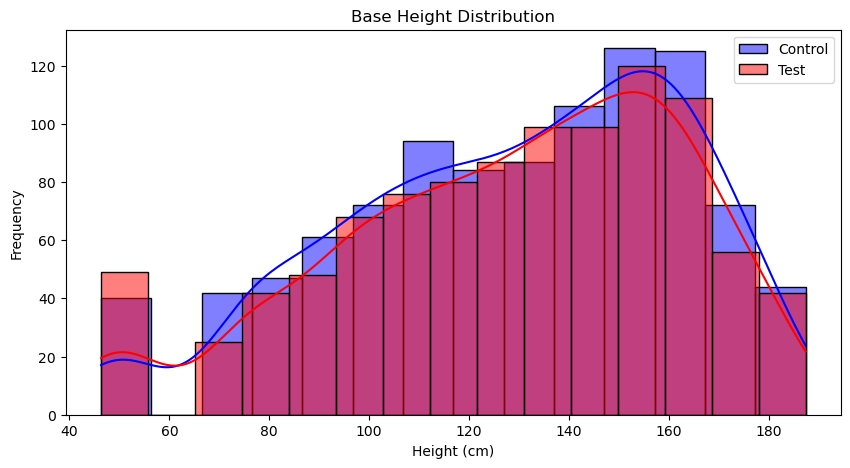

In [21]:
# PART 6: Visualize
plt.figure(figsize=(10,5))
sns.histplot(control_df['Base Height'], kde=True, label='Control', color='blue')
sns.histplot(test_df['Base Height'], kde=True, label='Test', color='red')
plt.legend()
plt.title('Base Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

In [22]:
# PART 7: Calculating height increase over 12 months
# PART 7: Validate available month columns
df_columns = control_df.columns.tolist()
month_cols = [col for col in df_columns if col.startswith('Month')]
print("Available Month Columns:", month_cols)

Available Month Columns: ['Month 1', 'Month 2', 'Month 3', 'Month 4 ', 'Month 5', 'Month 6', 'Month 7 ', 'Month 8', 'Month 9', 'Month 10', 'Month 11', 'Month 12']


In [39]:
# PART 8: Calculate height increase over time
if month_cols:
    control_df['Height Increase'] = control_df[month_cols[-1]] - control_df['Base Height']
    test_df['Height Increase'] = test_df[month_cols[-1]] - test_df['Base Height']
else:
    print("Error: No valid month columns found!")


C:\Users\brajagopal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brajagopal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


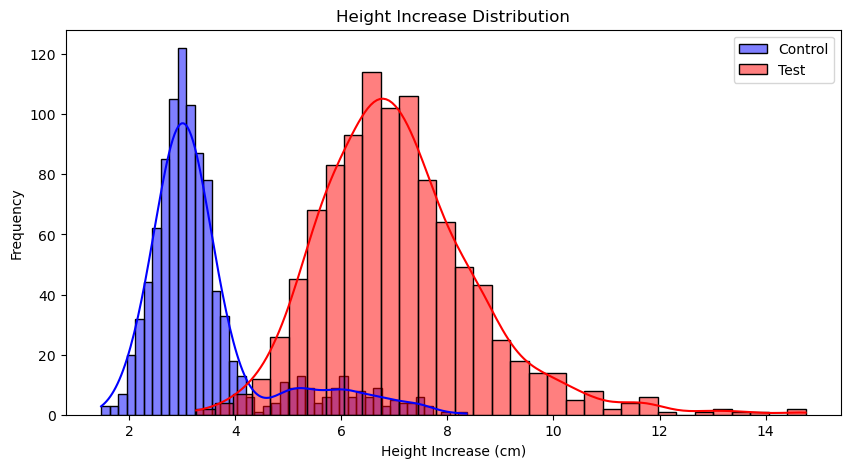

In [24]:
# PART 9: Visualize height growth
plt.figure(figsize=(10,5))
sns.histplot(control_df['Height Increase'], kde=True, label='Control', color='blue')
sns.histplot(test_df['Height Increase'], kde=True, label='Test', color='red')
plt.legend()
plt.title('Height Increase Distribution')
plt.xlabel('Height Increase (cm)')
plt.ylabel('Frequency')
plt.show()


In [25]:
# PART 10: Average height increase
avg_control_growth = control_df['Height Increase'].mean()
avg_test_growth = test_df['Height Increase'].mean()
print(f"Average Height Increase - Control Group: {avg_control_growth:.2f} cm")
print(f"Average Height Increase - Test Group: {avg_test_growth:.2f} cm")

Average Height Increase - Control Group: 3.42 cm
Average Height Increase - Test Group: 7.08 cm


In [26]:
# PART 11: Hypothesis Testing
# Null Hypothesis (H0): No significant difference in height increase
# Alternative Hypothesis (H1): Test group has significantly higher height increase
t_stat, p_value = stats.ttest_ind(test_df['Height Increase'], control_df['Height Increase'], equal_var=False)

print("\nHypothesis Testing Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")



Hypothesis Testing Results:
T-statistic: 60.4904
P-value: 0.0000


In [27]:
# PART 12: result
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. BlueBull has a significant impact on height increase.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant evidence that BlueBull increases height.")

Conclusion: Reject the null hypothesis. BlueBull has a significant impact on height increase.


## The CEO can market this product BlueBull is a height enhancer.

In [35]:
# PART 13: Categorization of Results Across Different Segments
print("\nFinal Categorization ---")

# Overall categorization:
overall_diff = avg_test_growth - avg_control_growth
if p_value < 0.05:
    overall_category = "Works" if overall_diff > 0 else "Doesn't Work"
else:
    overall_category = "Needs Further Investigation"
print("\nOverall Result:")
print(f"Mean Difference: {overall_diff:.2f} cm, Category: {overall_category}")



Final Categorization ---

Overall Result:
Mean Difference: 3.66 cm, Category: Works


In [42]:
# PART 14:State-wise categorization:
state_categories = []
for state in state_results_df['State']:
    test_mean = test_df[test_df['State'] == state]['Height Increase'].mean()
    control_mean = control_df[control_df['State'] == state]['Height Increase'].mean()
    diff = test_mean - control_mean
    p_val = state_results_df[state_results_df['State'] == state]['P-Value'].values[0]
    if p_val < 0.05:
        category = "Works" if diff > 0 else "Doesn't Work"
    else:
        category = "Needs Further Investigation"
    state_categories.append((state, diff, p_val, category))
state_categories_df = pd.DataFrame(state_categories, columns=['State', 'Mean Difference', 'P-Value', 'Category'])
print("\nState-wise Categorization:")
print(state_categories_df)


State-wise Categorization:
               State  Mean Difference       P-Value Category
0     Andhra Pradesh         3.656531  3.436105e-31    Works
1              Assam         3.728997  4.101700e-17    Works
2              Bihar         3.633459  3.898941e-39    Works
3        Chattisgarh         4.069495  6.128644e-10    Works
4            Gujarat         3.844193  6.543918e-22    Works
5            Haryana         3.991582  1.449661e-09    Works
6   Himachal Pradesh         3.365179  6.573687e-05    Works
7   Jammu & Kashmir          3.344107  2.081999e-06    Works
8          Jharkhand         3.701663  1.646584e-12    Works
9          Karnataka         3.434401  7.938953e-23    Works
10            Kerala         2.989327  8.142223e-10    Works
11    Madhya Pradesh         3.374829  5.694891e-25    Works
12       Maharashtra         4.097357  3.007765e-45    Works
13      NCT of Delhi         4.203761  1.140366e-09    Works
14            Odisha         3.575180  1.142056e-18    Wo

## As the mean difference is positive and all the states p-value>0.05,so the CEO can market this product across India that BlueBull is a height enhancer.

In [37]:
# PART 15:Gender-wise categorization:
gender_categories = []
for gender in [0, 1]:
    gender_label = 'Female' if gender == 0 else 'Male'
    test_mean = test_df[test_df['Is Male?'] == gender]['Height Increase'].mean()
    control_mean = control_df[control_df['Is Male?'] == gender]['Height Increase'].mean()
    diff = test_mean - control_mean
    # Use p-value from gender_results_df if available
    subset = gender_results_df[gender_results_df['Gender'] == gender_label]
    p_val = subset['P-Value'].values[0] if not subset.empty else None
    if p_val is not None and p_val < alpha:
        category = "Works" if diff > 0 else "Doesn't Work"
    else:
        category = "Needs Further Investigation"
    gender_categories.append((gender_label, diff, p_val, category))
gender_categories_df = pd.DataFrame(gender_categories, columns=['Gender', 'Mean Difference', 'P-Value', 'Category'])
print("\nGender-wise Categorization:")
print(gender_categories_df)



Gender-wise Categorization:
   Gender  Mean Difference        P-Value Category
0  Female         3.894991  9.315918e-183    Works
1    Male         3.464934   0.000000e+00    Works


## in case of both Female and male, the mean difference is positive and p-value<0.05,so the CEO can market this product across gender.

In [38]:
# PART 16:Age group categorization:
age_categories = []
for age in age_results_df['Age']:
    test_mean = test_df[test_df[age_column] == age]['Height Increase'].mean()
    control_mean = control_df[control_df[age_column] == age]['Height Increase'].mean()
    diff = test_mean - control_mean
    p_val = age_results_df[age_results_df['Age'] == age]['P-Value'].values[0]
    if p_val < alpha:
        category = "Works" if diff > 0 else "Doesn't Work"
    else:
        category = "Needs Further Investigation"
    age_categories.append((age, diff, p_val, category))
age_categories_df = pd.DataFrame(age_categories, columns=['Age', 'Mean Difference', 'P-Value', 'Category'])
print("\nAge Group Categorization:")
print(age_categories_df)


Age Group Categorization:
    Age  Mean Difference       P-Value Category
0     0         2.839942  4.353814e-14    Works
1     1         2.006888  1.359837e-12    Works
2     2         3.296598  7.473988e-21    Works
3     3         3.830144  1.199511e-33    Works
4     4         5.179034  1.194339e-22    Works
5     5         2.093949  1.645796e-10    Works
6     6         3.805670  2.373762e-38    Works
7     7         5.526470  3.242009e-20    Works
8     8         4.476138  9.244558e-36    Works
9     9         4.128380  2.450660e-26    Works
10   10         4.319280  1.180144e-27    Works
11   11         4.342421  9.613981e-29    Works
12   12         3.715551  6.722314e-26    Works
13   13         3.898621  7.655542e-33    Works
14   14         3.626417  2.236180e-28    Works
15   15         4.191109  8.780790e-30    Works
16   16         2.743853  5.790899e-16    Works
17   17         1.315387  6.024173e-08    Works
18   18         3.729375  2.706031e-29    Works
19   19      

## As the mean difference is positive but all the ages p-value<0.05,so the CEO can market this product across age groups.

## conclusion:the CEO can market this product across India,across age group(<=19),across gender that BlueBull is a height enhancer.There are no categories in data where there is a need for further investigation or where BlueBull does not work.